In [2]:
from rouge_score import rouge_scorer
from collections import defaultdict
import numpy as np

def get_rouge_score(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])
    aggregate_score = defaultdict(list)

    for result, ref in zip(predictions, references):
        for key, val in scorer.score(result, ref).items():
            aggregate_score[key].append(val.fmeasure)

    scores = {}
    for key in aggregate_score:
        scores[key] = np.mean(aggregate_score[key])
    
    return scores

In [3]:
from datasets import load_dataset

dataset_url = "pubmed_qa"
split = "train"
subset = "pqa_labeled"
ds_raw = load_dataset(dataset_url, subset, split=split)
ds_raw

Found cached dataset pubmed_qa (/Users/deanchanter/.cache/huggingface/datasets/pubmed_qa/pqa_labeled/1.0.0/dd4c39f031a958c7e782595fa4dd1b1330484e8bbadd4d9212e5046f27e68924)


Dataset({
    features: ['pubid', 'question', 'context', 'long_answer', 'final_decision'],
    num_rows: 1000
})

In [4]:
df_raw = ds_raw.to_pandas()

In [14]:
def extract_columns(row):
    row['ground_truths'] = ', '.join(row['context']['contexts'])
    row['labels'] = ', '.join(row['context']['labels'])
    row['meshes'] = ', '.join(row['context']['meshes'])
    return row

df_clean = df_raw.apply(extract_columns, axis=1).drop(columns=['context'])

df_clean

,pubid,question,long_answer,final_decision,ground_truths,labels,meshes
0,21645374,Do mitochondria play a role in remodelling lac...,Results depicted mitochondrial dynamics in viv...,yes,Programmed cell death (PCD) is the regulated d...,"BACKGROUND, RESULTS","Alismataceae, Apoptosis, Cell Differentiation,..."
1,16418930,Landolt C and snellen e acuity: differences in...,"Using the charts described, there was only a s...",no,Assessment of visual acuity depends on the opt...,"BACKGROUND, PATIENTS AND METHODS, RESULTS","Adolescent, Adult, Aged, Aged, 80 and over, Am..."
2,9488747,"Syncope during bathing in infants, a pediatric...","""Aquagenic maladies"" could be a pediatric form...",yes,Apparent life-threatening events in infants ar...,"BACKGROUND, CASE REPORTS","Baths, Histamine, Humans, Infant, Syncope, Urt..."
3,17208539,Are the long-term results of the transanal pul...,Our long-term study showed significantly bette...,no,The transanal endorectal pull-through (TERPT) ...,"PURPOSE, METHODS, RESULTS","Child, Child, Preschool, Colectomy, Female, Hi..."
4,10808977,Can tailored interventions increase mammograph...,The effects of the intervention were most pron...,yes,Telephone counseling and tailored print commun...,"BACKGROUND, DESIGN, PARTICIPANTS, INTERVENTION...","Cost-Benefit Analysis, Female, Health Maintena..."
...,...,...,...,...,...,...,...
995,8921484,Does gestational age misclassification explain...,Gestational age misclassification is an unlike...,no,"After 34 weeks gestation, summary measures of ...","BACKGROUND, METHODS, RESULTS","Adult, Australia, Birth Weight, Classification..."
996,16564683,Is there any interest to perform ultrasonograp...,Sonography has no place in the diagnosis of un...,no,To evaluate the accuracy of ultrasonographic e...,"OBJECTIVE, MATERIAL AND METHODS, RESULTS","Child, Child, Preschool, Cryptorchidism, Human..."
997,23147106,Is peak concentration needed in therapeutic dr...,These results suggest little need to use peak ...,no,We analyzed the pharmacokinetic-pharmacodynami...,"BACKGROUND, METHODS, RESULTS","Aged, Aged, 80 and over, Anti-Bacterial Agents..."
998,21550158,Can autologous platelet-rich plasma gel enhanc...,"The PRP group recorded reduced pain, swelling,...",yes,This investigation assesses the effect of plat...,"PURPOSE, PATIENTS AND METHODS, RESULTS","Adult, Bone Regeneration, Chi-Square Distribut..."


In [6]:
import pandas as pd
df_test_results = pd.read_csv("pubqa_output.csv")
df_test_results

,Unnamed: 0,index,pubid,question,comma_output,comma_source,comma_page_content
0,0,0,21645374,Do mitochondria play a role in remodelling lac...,"Yes, mitochondria play a role in remodelling ...",21645374,Programmed cell death (PCD) is the regulated d...
1,1,1,16418930,Landolt C and snellen e acuity: differences in...,"According to the study, there were small diff...",16418930,Assessment of visual acuity depends on the opt...
2,2,2,9488747,"Syncope during bathing in infants, a pediatric...","\n Yes, syncope during bathing in infan...","9488747, 9488747, 9488747",Apparent life-threatening events in infants ar...
3,3,3,17208539,Are the long-term results of the transanal pul...,"According to the study, the long-term results...","17208539, 17208539",The transanal endorectal pull-through (TERPT) ...
4,4,4,10808977,Can tailored interventions increase mammograph...,"Yes, tailored interventions can increase mamm...","10808977, 10808977",Telephone counseling and tailored print commun...
...,...,...,...,...,...,...,...
995,995,995,8921484,Does gestational age misclassification explain...,"No, gestational age misclassification does no...",8921484,"After 34 weeks gestation, summary measures of ..."
996,996,996,16564683,Is there any interest to perform ultrasonograp...,Ultrasonography (US) is a noninvasive diagnos...,NaN,NaN
997,997,997,23147106,Is peak concentration needed in therapeutic dr...,"According to the study, peak concentration is...","23147106, 23147106",We analyzed the pharmacokinetic-pharmacodynami...
998,998,998,21550158,Can autologous platelet-rich plasma gel enhanc...,"According to the given text, a prospective ra...","21550158, 21550158",This investigation assesses the effect of plat...


In [15]:
df_test_results_clean = df_test_results[['pubid','comma_output']]
df_test_results_merge = pd.merge(df_test_results_clean,df_clean[['pubid','long_answer','ground_truths']],how='left', on='pubid')
df_test_results_merge = df_test_results_merge.drop(columns=['pubid'])#.rename({'comma_output':'answer','comma_page_content':'contexts'},axis=1)
#df_test_results_merge['contexts'] = df_test_results_merge['contexts'].fillna('none').apply(lambda x: [x])
df_test_results_merge = df_test_results_merge.reset_index(drop=True)
df_test_results_merge

,comma_output,long_answer,ground_truths
0,"Yes, mitochondria play a role in remodelling ...",Results depicted mitochondrial dynamics in viv...,Programmed cell death (PCD) is the regulated d...
1,"According to the study, there were small diff...","Using the charts described, there was only a s...",Assessment of visual acuity depends on the opt...
2,"\n Yes, syncope during bathing in infan...","""Aquagenic maladies"" could be a pediatric form...",Apparent life-threatening events in infants ar...
3,"According to the study, the long-term results...",Our long-term study showed significantly bette...,The transanal endorectal pull-through (TERPT) ...
4,"Yes, tailored interventions can increase mamm...",The effects of the intervention were most pron...,Telephone counseling and tailored print commun...
...,...,...,...
995,"No, gestational age misclassification does no...",Gestational age misclassification is an unlike...,"After 34 weeks gestation, summary measures of ..."
996,Ultrasonography (US) is a noninvasive diagnos...,Sonography has no place in the diagnosis of un...,To evaluate the accuracy of ultrasonographic e...
997,"According to the study, peak concentration is...",These results suggest little need to use peak ...,We analyzed the pharmacokinetic-pharmacodynami...
998,"According to the given text, a prospective ra...","The PRP group recorded reduced pain, swelling,...",This investigation assesses the effect of plat...


In [8]:
print(get_rouge_score(df_test_results_merge['comma_output'],df_test_results_merge['long_answer'] ))

{'rouge1': 0.24938155525975514, 'rouge2': 0.08723571890904522, 'rougeL': 0.1683300227331073, 'rougeLsum': 0.17448446794840738}


In [16]:
print(get_rouge_score(df_test_results_merge['comma_output'],df_test_results_merge['ground_truths'] ))

{'rouge1': 0.45904753115950486, 'rouge2': 0.2885635131980683, 'rougeL': 0.32351732769540714, 'rougeLsum': 0.34782975432376884}


In [17]:
ragas_df = pd.read_csv("ragas_results_no_context_rel_content_recall_with_source.csv")

<Axes: >

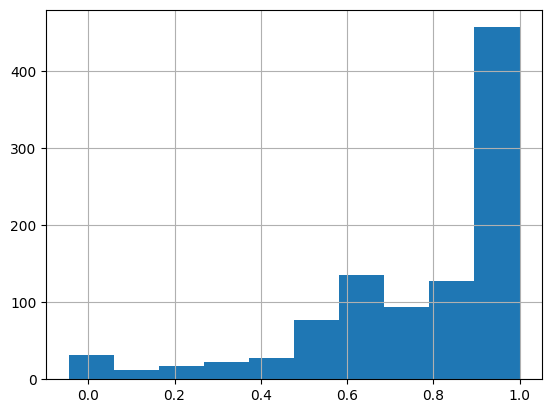

In [20]:
ragas_df['faithfulness'].hist()

In [38]:
ragas_df.query("contexts == @c_none")

,Unnamed: 0,question,contexts,answer,ground_truths,faithfulness,answer_relevancy,context_recall,harmfulness
5,5,Double balloon enteroscopy: is it efficacious ...,['none'],Double balloon enteroscopy is a minimally inv...,"['From March 2007 to January 2011, 88 DBE proc...",0.100000,0.895766,0.0,0
16,16,Is there still a need for living-related liver...,['none'],"Yes, there is still a need for living-related...",['To assess and compare the value of split-liv...,0.000000,0.918362,0.0,0
26,26,Implementation of epidural analgesia for labor...,['none'],Epidural analgesia is a widely used method of...,['Social and cultural factors combined with li...,0.450000,0.881984,0.0,0
28,28,Is halofantrine ototoxic?,['none'],Halofantrine is an antimalarial drug that has...,['Halofantrine is a newly developed antimalari...,-0.045455,0.870561,0.0,0
32,32,Is a mandatory general surgery rotation necess...,['none'],"Yes, a mandatory general surgery rotation is ...",['Changes in the spectrum of general surgery a...,0.214286,0.923755,0.8,0
...,...,...,...,...,...,...,...,...,...
979,979,Does a geriatric oncology consultation modify ...,['none'],"Yes, a geriatric oncology consultation can mo...",['This study was performed to describe the tre...,0.857143,0.883443,0.0,0
985,985,Does septoplasty change the dimensions of comp...,['none'],"No, septoplasty does not change the dimension...",['To measure the dimensions of compensatory hy...,0.125000,0.689953,0.0,0
992,992,Do oblique views add value in the diagnosis of...,['none'],Oblique views can be useful in the diagnosis ...,"['Anteroposterior, lateral, and right and left...",1.000000,0.947838,0.8,0
993,993,Are many colorectal cancers due to missed aden...,['none'],"Yes, many colorectal cancers are thought to b...",['An unknown number of colorectal cancers coul...,0.538462,0.808063,0.0,0


In [36]:
c_none = ragas_df.iloc[683]['contexts']

<Axes: >

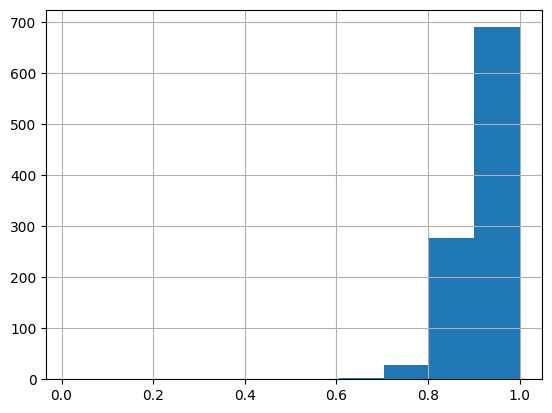

In [21]:
ragas_df["answer_relevancy"].hist()

In [24]:
import seaborn as sns

<Axes: xlabel='faithfulness', ylabel='context_recall'>

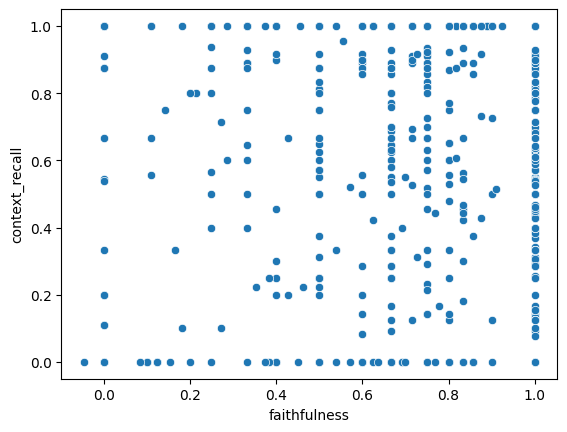

In [25]:
sns.scatterplot(data=ragas_df,x='faithfulness',y='context_recall')